In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load California housing dataset
from sklearn.datasets import fetch_california_housing

In [3]:
california_housing = fetch_california_housing(as_frame=True)
california_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
#Check dataset description
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
#The target variable is the median house value for California districts,
#expressed in hundreds of thousands of dollars ($100,000).
print(california_housing.target)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


1. Prepare the dataset

In [6]:
df = california_housing.frame

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
#Summarize the status of data
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

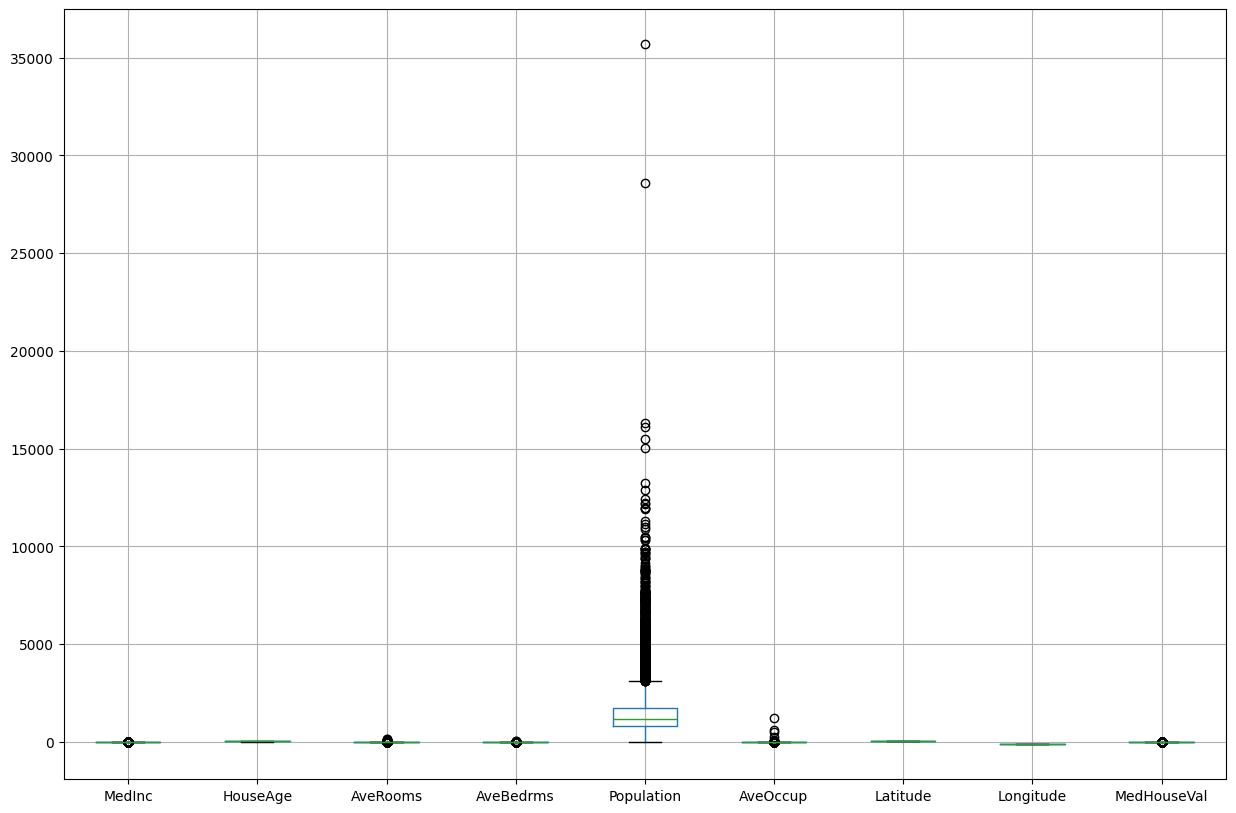

In [11]:
df.boxplot(figsize=(15, 10))

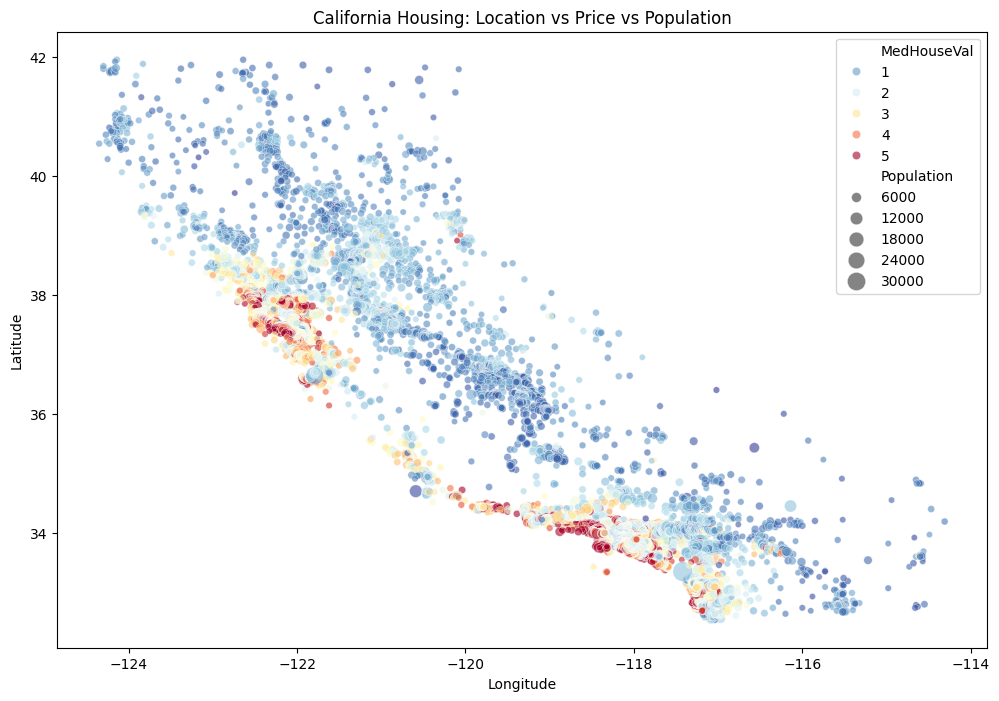

In [12]:
import seaborn as sns
#Geographic Visualization of price vs population
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', 
                hue='MedHouseVal',
                palette='RdYlBu_r',  # Red=expensive, Blue=cheap
                size='Population',
                sizes=(20, 200),
                alpha=0.6)
plt.title('California Housing: Location vs Price vs Population')
plt.show()

- Dense areas on coast and LA tends to be cheaper despite the fact that coastal areas are high in prices.
- Central valley and rural areas are medium/low population with lower prices

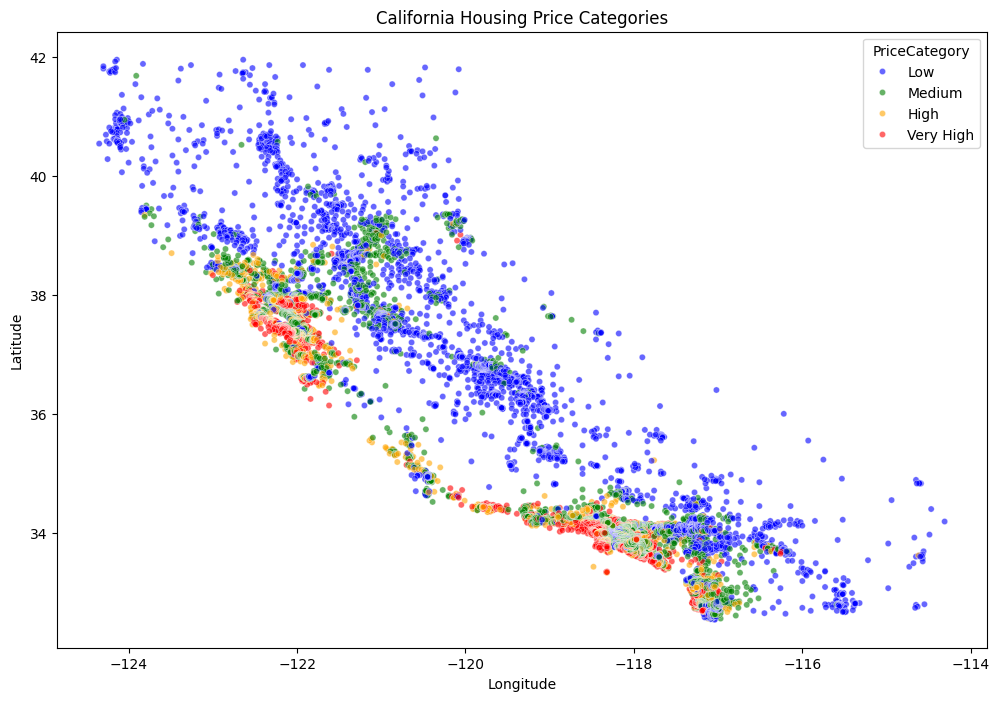

In [13]:
#Price Categories for Better Contast
df['PriceCategory'] = pd.cut(df['MedHouseVal'], 
                            bins=[0, 1.5, 2.5, 3.5, 5.5], 
                            labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude',
                hue='PriceCategory', 
                palette=['blue', 'green', 'orange', 'red'],
                alpha=0.6, s=20)
plt.title('California Housing Price Categories')
plt.show()

- Concentration of high-price houses in Bay Area and LA
- Coastal areas genearlly more expensive
- Part of LA/Orange county mixed colors 
- Central valley has lower prices

In [15]:
df.drop('PriceCategory', axis=1, inplace=True)

In [ ]:
df_original = df.copy() # For tree-based models

# Scaled version for linear regreesion
# Scaling features makes Linear Regression's cost function more spherical, enabling Gradient Descent to converge
# faster and more directly to the global minimum, especially crucial for quick optimization.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 
                   'Population', 'AveOccup', 'Latitude', 'Longitude']
df_scaled = df.copy()
df_scaled[feature_columns] = scaler.fit_transform(df[feature_columns])

In [17]:
df_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,20640.000000
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15,2.068558
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.153956
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00,0.149990
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00,1.196000
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01,1.797000
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01,2.647250
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00,5.000010


<Axes: >

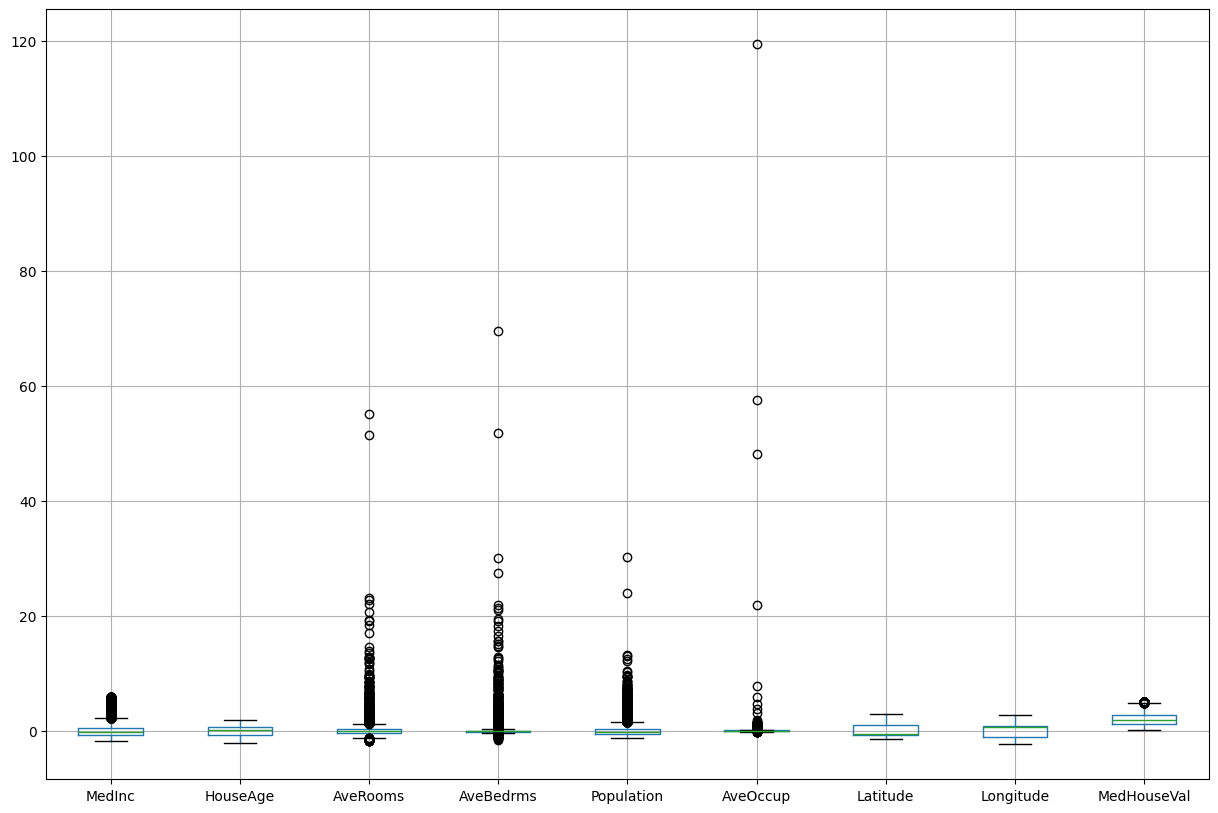

In [37]:
df_scaled.boxplot(figsize=(15, 10))

In [18]:
#Removing Outliers
for feature in ['AveRooms', 'AveBedrms', 'AveOccup']:
    upper_bound = df_scaled[feature].quantile(0.95)
    lower_bound = df_scaled[feature].quantile(0.05) 
    df_scaled[feature] = np.clip(df_scaled[feature], lower_bound, upper_bound)

<Axes: >

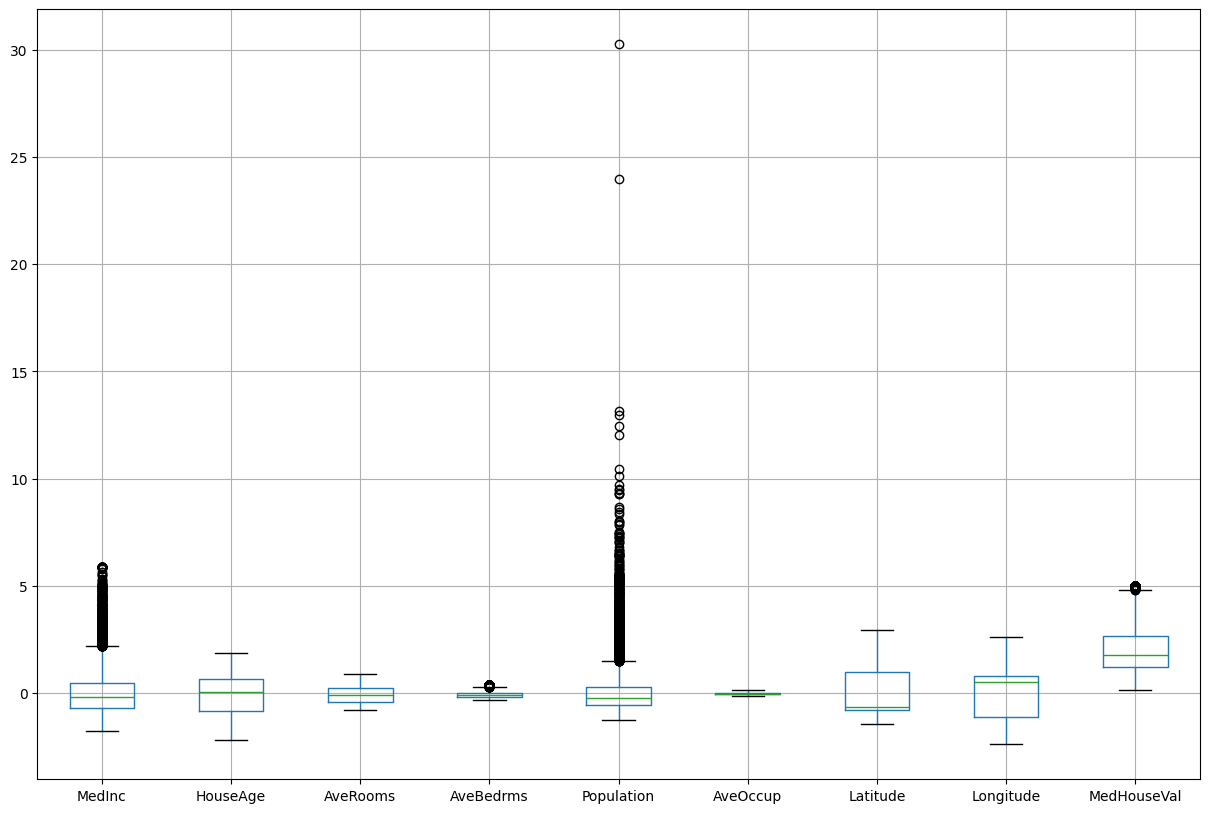

In [19]:
df_scaled.boxplot(figsize=(15, 10))

In [20]:
# Prepare data for training
X_scaled = df_scaled[feature_columns]  # Normalized features for Linear Regression
X_original = df_original[feature_columns]  # Original scale for tree models
y = df_original['MedHouseVal']  # Target variable

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

In [22]:
# 1. Train-Test Split for both datasets
#For linear regression
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
#For Tree based models
X_orig_train, X_orig_test, _, _ = train_test_split(
    X_original, y, test_size=0.2, random_state=42
)
print(f"Training set size: {X_scaled_train.shape[0]}")
print(f"Test set size: {X_scaled_test.shape[0]}")

Training set size: 16512
Test set size: 4128


In [41]:
# 2. Initialize Models with their appropriate datasets
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'X_train': X_scaled_train,
        'X_test': X_scaled_test,
        'data_type': 'normalized'
    },
    'Random Forest': {
        'model': RandomForestRegressor(
            n_estimators=100,
            random_state=1998,
            max_depth=12, # Default is None, which can lead to overfitting, Initial value was 10, after grid search 12
            min_samples_leaf=5, # Each leaf needs min samples to lower noise fitting
            max_features='log2', # Grid Search result
            min_samples_split=5 # Default is 2, but 5 provides more regularization and reduce overfitting
        ),
        'X_train': X_orig_train,
        'X_test': X_orig_test,
        'data_type': 'original'
    },
    'XGBoost': {
        'model': xgb.XGBRegressor(
            n_estimators=100,
            random_state=1998,
            max_depth=6, #default and less than RandomForest because xgboost uses boosting
            learning_rate=0.15, #Initial value 0.1, 0.15 after grid search
            reg_alpha=0.5,         # L1 regularization
            reg_lambda=1.0,        # L2 regularization
            min_child_weight=3,    # Minimum samples per leaf
            subsample=0.8,         # Use 80% of data per tree
            colsample_bytree=0.8,  # Use 80% of features per tree
        ),
        'X_train': X_orig_train,
        'X_test': X_orig_test,
        'data_type': 'original'
    }
    
}

In [42]:
# 3. Train Models and Store Results
results = {}

for name, model_config in models.items():
    print(f"\n--- Training {name} on {model_config['data_type']} data ---")
    
    model = model_config['model']
    X_train_data = model_config['X_train']
    X_test_data = model_config['X_test']
    
    # Train the model
    model.fit(X_train_data, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train_data)
    y_test_pred = model.predict(X_test_data)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_rmse': np.sqrt(train_mse),
        'test_rmse': np.sqrt(test_mse),
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_mae': test_mae,
        'predictions': y_test_pred,
        'data_type': model_config['data_type']
    }
    
    print(f"Train RMSE: {np.sqrt(train_mse):,.2f}")
    print(f"Test RMSE: {np.sqrt(test_mse):,.2f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test MAE: {test_mae:,.2f}")



--- Training Linear Regression on normalized data ---
Train RMSE: 0.67
Test RMSE: 0.68
Test R²: 0.6499
Test MAE: 0.50

--- Training Random Forest on original data ---
Train RMSE: 0.41
Test RMSE: 0.52
Test R²: 0.7939
Test MAE: 0.35

--- Training XGBoost on original data ---
Train RMSE: 0.35
Test RMSE: 0.46
Test R²: 0.8382
Test MAE: 0.31


- Results before regularization (grid search values):

    --- Training Linear Regression on normalized data ---
    Train RMSE: 0.67
    Test RMSE: 0.68
    Test R²: 0.6499
    Test MAE: 0.50

    --- Training Random Forest on original data ---
    Train RMSE: 0.42
    Test RMSE: 0.54
    Test R²: 0.7750
    Test MAE: 0.36

    --- Training XGBoost on original data ---
    Train RMSE: 0.37
    Test RMSE: 0.48
    Test R²: 0.8266
    Test MAE: 0.32

- Results after regularization (grid search values):

    --- Training Linear Regression on normalized data ---
    Train RMSE: 0.67
    Test RMSE: 0.68
    Test R²: 0.6499
    Test MAE: 0.50

    --- Training Random Forest on original data ---
    Train RMSE: 0.41
    Test RMSE: 0.52
    Test R²: 0.7939
    Test MAE: 0.35

    --- Training XGBoost on original data ---
    Train RMSE: 0.35
    Test RMSE: 0.46
    Test R²: 0.8382
    Test MAE: 0.31

Before Grid Search with Default values for each model

Step 3 is preliminary evaluation based on single, fixed split on data into train/test sets.
1. Linear rgression:
    - Performance: This is our baseline. High RMSE and MAE.
    - Overfitting: train RMSE(0.67) is very close to test RMSE(0.68). This indicates no overfitting and model is generalizing well.

2. Random Forest:
    - Performance: This model performs significantly better than linear regresssion on test set. RMSE and MAE are considerably lower.
    - Overfitting: The Train RMSE (0.42) is noticeably lower than the Test RMSE (0.54). This indicates some overfitting. The model has learned the training data quite well, possibly including some noise, which leads to a slight drop in performance on unseen data. However, the test performance is still good.

3. XGBoost:
    - Performance: XGBoost is currently the best-performing model on the test set among the three.
    - Overfitting: Similar to Random Forest, the Train RMSE (0.37) is significantly lower than the Test RMSE (0.48), indicating overfitting. XGBoost, being a very powerful model, often has a strong tendency to overfit the training data if not carefully tuned.

Overfitting Assessment Framework:
Mild Overfitting (Our Case):

    . 5-15% difference: Normal, acceptable
    . 15-30% difference: Mild overfitting 
    . 30-50% difference: Moderate overfitting 
    . >50% difference: Severe overfitting 

In [43]:
# 4. Cross-Validation for More Robust Evaluation
print("\n--- Cross-Validation Results ---")
cv_results = {}

for name, model_config in models.items():
    model = model_config['model']
    X_train_data = model_config['X_train']
    
    cv_scores = cross_val_score(model, X_train_data, y_train, 
                               cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    cv_results[name] = cv_rmse
    
    print(f"{name} ({model_config['data_type']} data):")
    # Calculates average of 5 RMSE scores, and standard deviation of the 5 RMSE; a smaller value indicates more consistent performance
    print(f"  CV RMSE: {cv_rmse.mean():,.2f} (+/- {cv_rmse.std() * 2:,.2f})")


--- Cross-Validation Results ---
Linear Regression (normalized data):
  CV RMSE: 0.67 (+/- 0.02)
Random Forest (original data):
  CV RMSE: 0.51 (+/- 0.01)
XGBoost (original data):
  CV RMSE: 0.47 (+/- 0.01)


In [ ]:
'''
#Regularization Grid Search
from sklearn.model_selection import GridSearchCV
rf_param_grid = {
    'max_depth': [6, 8, 10, 12],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['sqrt', 'log2', 0.8]
}

# XGBoost Regularization Grid  
xgb_param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.15],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.5, 1.0, 1.5],
    'min_child_weight': [1, 3, 5]
}

def tune_regularization(X_train, y_train):
    """
    Tune regularization parameters using Grid Search with Cross-Validation
    """
    results = {}
    
    # Random Forest Tuning
    print("Tuning Random Forest...")
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_grid = GridSearchCV(
        rf, rf_param_grid, 
        cv=5, 
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    rf_grid.fit(X_train, y_train)
    
    print(f"Best RF params: {rf_grid.best_params_}")
    print(f"Best RF CV RMSE: {np.sqrt(-rf_grid.best_score_):.4f}")
    results['rf_best'] = rf_grid.best_estimator_
    
    # XGBoost Tuning
    print("\nTuning XGBoost...")
    xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)
    xgb_grid = GridSearchCV(
        xgb_reg, xgb_param_grid,
        cv=5,
        scoring='neg_mean_squared_error', 
        n_jobs=-1,
        verbose=1
    )
    xgb_grid.fit(X_train, y_train)
    
    print(f"Best XGB params: {xgb_grid.best_params_}")
    print(f"Best XGB CV RMSE: {np.sqrt(-xgb_grid.best_score_):.4f}")
    results['xgb_best'] = xgb_grid.best_estimator_
    
    return results
'''

In [32]:
#best_models = tune_regularization(X_orig_train, y_train)

Tuning Random Forest...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best RF params: {'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best RF CV RMSE: 0.5156

Tuning XGBoost...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best XGB params: {'learning_rate': 0.15, 'max_depth': 6, 'min_child_weight': 3, 'reg_alpha': 0.5, 'reg_lambda': 1.0}
Best XGB CV RMSE: 0.4682


# Reularization Grid Search Result:
Tuning Random Forest...
Fitting 5 folds for each of 144 candidates, totalling 720 fits

Best RF params: {'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best RF CV RMSE: 0.5156

Tuning XGBoost...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Best XGB params: {'learning_rate': 0.15, 'max_depth': 6, 'min_child_weight': 3, 'reg_alpha': 0.5, 'reg_lambda': 1.0}
Best XGB CV RMSE: 0.4682

- Random Forest
    - Before(default): Train RMSE=0.42, Test RMSE=0.54, CV RMSE= 0.54(+/-0.01)
    - After(GridSearch): Train RMSE: $0.41, Test RMSE: $0.52, CV RMSE: $0.51 (+/- 0.01)
    - Analysis: Improved Generalization!overfitting is still occurring. However, the absolute error on unseen data has decreased, which is the primary goal. 

- XGBoost:
    - Before (Default): Train RMSE: $0.37, Test RMSE: $0.48, CV RMSE: $0.48 (+/- 0.01)
    - After (Grid Search): Train RMSE: $0.35, Test RMSE: $0.46, CV RMSE: $0.47 (+/- 0.01)
    - Analysis: Improved Generalization!overfitting is still present. However, the tuning has successfully made the model's predictions on unseen data even more accurate.



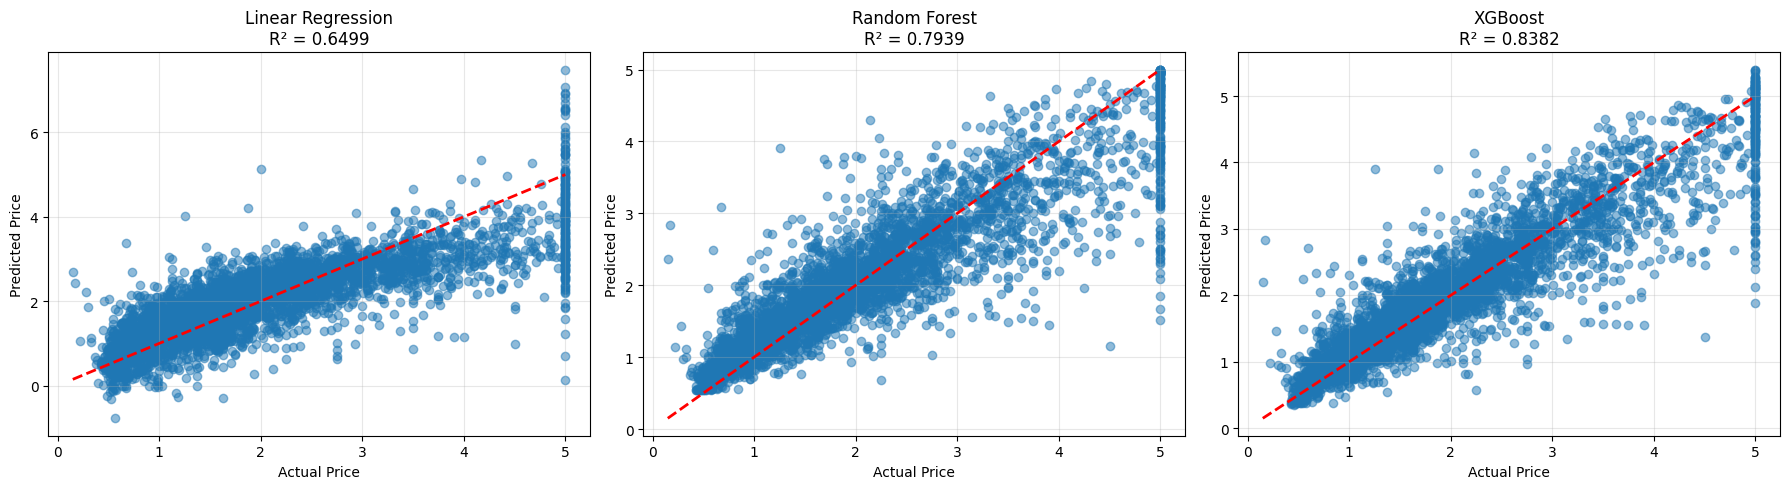

In [55]:
# 7. Prediction vs Actual Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, model_data) in enumerate(results.items()):
    ax = axes[i]
    ax.scatter(y_test, model_data['predictions'], alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_xlabel('Actual Price')
    ax.set_ylabel('Predicted Price')
    ax.set_title(f'{name}\nR² = {model_data["test_r2"]:.4f}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [65]:
# Choose best model based on CV results
def select_best_model(results):
    """Automatically select best performing model"""
    best_name = min(results.keys(), key=lambda x: results[x]['test_rmse'])
    best_score_rmse = results[best_name]['test_rmse']
    best_score_r2 = results[best_name]['test_r2']
    best_score_MAE = results[best_name]['test_mae']
    
    #print(f"🏆 Best Model: {best_name}")
    #print(f"📊 Test RMSE: {best_score_rmse:.4f}")
    #print(f"📊 Test R²: {best_score_r2:.4f}")
    #print(f"📊 Test MAE: {best_score_MAE:.4f}")
    
    return best_name
select_best_model(results)

'XGBoost'

In [75]:
#Extract XGBoost (Best model) from results
xgb_model = results['XGBoost']['model']
xgb_model.predict(X_original.iloc[[0]])


array([4.4581285], dtype=float32)

In [71]:
df_original.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [91]:
def predict_house_price(features, model=xgb_model):
    """
    Predict California house prices using the trained XGBoost model
    """
    predictions = model.predict(features)
    return predictions


In [103]:
prediction= predict_house_price(X_original.iloc[[0]])
print(prediction)

[4.4581285]


In [106]:
prediction2 = predict_house_price(X_original.iloc[[0]], model= results['Random Forest']['model'])
print(prediction2)

[4.38487147]


In [109]:
prediction3 = predict_house_price(X_scaled.iloc[[0]], model= results['Linear Regression']['model'])
print(prediction3)

[4.13030828]


In [108]:
print(y.iloc[[0]])

0    4.526
Name: MedHouseVal, dtype: float64


In [123]:
house_data = pd.DataFrame({
        'MedInc': [9.8214],
        'HouseAge': [20.0],
        'AveRooms': [7.5],
        'AveBedrms': [1.2],
        'Population': [458.0],
        'AveOccup': [2.1],
        'Latitude': [36.62],
        'Longitude': [-121.90]

    })

price= predict_house_price(house_data)
print(price)

[4.5651507]


In [110]:
# PICKLE SECTION, Saving trained models and results
import pickle
import os
from datetime import datetime

In [112]:
def save_models_and_results(results, models, scaler=None, save_dir="models"):
    """
    Save all trained models, results, and metadata
    """
    # Create directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)
    
    # Save the complete results dictionary
    print("Saving complete results dictionary...")
    with open(f"{save_dir}/ca_housing_results.pkl", 'wb') as f:
        pickle.dump(results, f)
    
    # Save individual models for easier loading
    print("Saving individual models...")
    for name, result in results.items():
        model_filename = f"{save_dir}/{name.lower().replace(' ', '_')}_model.pkl"
        with open(model_filename, 'wb') as f:
            pickle.dump(result['model'], f)
        print(f"  - {name} saved to {model_filename}")
    
    # Save the scaler if provided
    if scaler is not None:
        print("Saving scaler...")
        with open(f"{save_dir}/scaler.pkl", 'wb') as f:
            pickle.dump(scaler, f)
    
    # Save metadata
    metadata = {
        'timestamp': datetime.now().isoformat(),
        'models_trained': list(results.keys()),
        'best_model': select_best_model(results),
        'feature_columns': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'],
        'target_variable': 'y',
        'data_used': {name: config['data_type'] for name, config in models.items()},
        'model_performance': {name: {'test_rmse': result['test_rmse'], 'test_r2': result['test_r2']} 
                            for name, result in results.items()}
    }
    
    with open(f"{save_dir}/metadata.pkl", 'wb') as f:
        pickle.dump(metadata, f)
    
    print(f"\nAll models and metadata saved to '{save_dir}' directory!")
    return True



In [113]:
# Save models, features, and results
save_models_and_results(results, models, scaler)  

Saving complete results dictionary...
Saving individual models...
  - Linear Regression saved to models/linear_regression_model.pkl
  - Random Forest saved to models/random_forest_model.pkl
  - XGBoost saved to models/xgboost_model.pkl
Saving scaler...

All models and metadata saved to 'models' directory!


True

In [120]:
def load_models_and_results(save_dir="models"):
    """
    Load all saved models and results
    """
    #print("Loading models and results...")
    
    # Load complete results
    with open(f"{save_dir}/ca_housing_results.pkl", 'rb') as f:
        results = pickle.load(f)
    
    # Load metadata
    with open(f"{save_dir}/metadata.pkl", 'rb') as f:
        metadata = pickle.load(f)
    
    # Load scaler if exists
    scaler = None
    scaler_path = f"{save_dir}/scaler.pkl"
    if os.path.exists(scaler_path):
        with open(scaler_path, 'rb') as f:
            scaler = pickle.load(f)
    '''
    print(f"Loaded {len(results)} models:")
    for name in results.keys():
        print(f"  - {name}")
    '''
    
    
    return results, metadata, scaler

In [121]:
def predict_house_price_from_pickle(features, model_name="XGBoost", save_dir="models"):
    """
    Predict California house prices using a pickled model
    """
    # Load all models and extract the specific one
    loaded_results, metadata, scaler = load_models_and_results(save_dir)
    model = loaded_results[model_name]['model']
    
    predictions = model.predict(features)
    return predictions

In [124]:
# Prepare new data
new_house = pd.DataFrame({
    'MedInc': [9.8214],
    'HouseAge': [20.0],
    'AveRooms': [7.5],
    'AveBedrms': [1.2],
    'Population': [458.0],
    'AveOccup': [2.1],
    'Latitude': [36.62],
    'Longitude': [-121.90]
})
prediction_pkl = predict_house_price_from_pickle(new_house)
print(prediction_pkl)

[4.5651507]
